# Data Transfer From Kaggle to Drive

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Install the Kaggle Python package
!pip install -q kaggle
# Create a directory for Kaggle configuration
!mkdir -p ~/.kaggle
# Copy the Kaggle API credentials file to the Kaggle directory
!cp kaggle.json ~/.kaggle/
# Display the contents of the Kaggle directory to verify the presence of kaggle.json
!ls ~/.kaggle
# Set appropriate permissions for the Kaggle API credentials file
!chmod 600 ~/.kaggle/kaggle.json

kaggle.json


In [ ]:
# Install the Kaggle Python package
!pip install kaggle
# Download the "sarcasm" dataset from Kaggle
!kaggle datasets download -d danofer/sarcasm

 99% 214M/216M [00:14<00:00, 17.5MB/s]
100% 216M/216M [00:14<00:00, 16.1MB/s]


In [ ]:
from zipfile import ZipFile
# Specify the path to the zip file
file_name = "/content/sarcasm.zip"
# Use ZipFile to extract the contents of the zip file
with ZipFile(file_name, 'r') as zip:
    zip.extractall()  # Extract all files in the current working directory
    print('Done')

Done


In [1]:
import pandas as pd
df=pd.read_csv('train-balanced-sarcasm.csv')
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


In [2]:
# columns in dataframe
df.columns

Index(['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs',
       'date', 'created_utc', 'parent_comment'],
      dtype='object')

In [3]:
# Series with the counts of each unique value in the 'subreddit' column
df['subreddit'].value_counts()

,count
subreddit,
AskReddit,65677
politics,39496
worldnews,26377
leagueoflegends,21037
pcmasterrace,18988
...,...
LabiaGW,1
Expected,1
AnimalsStoppingFights,1


In [4]:
# filter data only for comments with subreddit as worldnews
df = df[df['subreddit']=='worldnews']
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
130,0,all of which is irrelevant to whether or not A...,Bernie_CombswBalloon,worldnews,1,-1,-1,2016-12,2016-12-01 16:50:16,I agree that his imprisonment is self imposed ...
238,0,"The fact we are arming ""rebels"" linked to AQ i...",CareToRemember,worldnews,-1,-1,-1,2016-12,2016-12-30 14:43:05,"Thank you Putin, for showing the level-headed ..."
251,0,Whilst knowing that what they were doing was i...,xNicolex,worldnews,1,1,0,2016-09,2016-09-05 11:10:45,Apple paid the taxes that Ireland required.
263,0,"If she's already agreed to step down, isn't th...",HugePurpleNipples,worldnews,2,-1,-1,2016-12,2016-12-03 16:59:43,South Korea opposition introduces bill to impe...
525,0,Were those who boycotted South Africa and only...,stainorstreak,worldnews,1,-1,-1,2016-11,2016-11-02 18:23:29,"if someone boycotted every muslim nation, and ..."
...,...,...,...,...,...,...,...,...,...,...
1010738,0,I foresee a thread laced with puns,niels_olson,worldnews,4,4,0,2009-01,2009-01-29 19:42:09,All we need now is the europeans to push the i...
1010754,1,looks like a reasonably unbiased and trustwort...,sleepingorange,worldnews,-2,-2,0,2009-04,2009-04-02 17:32:35,The Israeli army kidnaps 27 Palestinian civili...
1010794,1,butbutbut racism ethnic discrimination cultura...,gnyffel,worldnews,107,107,0,2009-07,2009-07-23 19:52:55,Tell me again why we don't fucking vet people ...
1010801,1,"Yes, and there's no such thing as mental illne...",Davin900,worldnews,-1,-1,0,2009-08,2009-08-14 18:34:29,And my parents had a rough upbringing/backgrou...


In [5]:
# df=df[['label', 'comment']]
# df

In [6]:
# Remove 3000 sarcastic and neutral samples from the data
df_0=df[df['label']==0].iloc[:-3000,:]
df_1=df[df['label']==1].iloc[:-3000,:]
df=pd.concat([df_0, df_1])
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
130,0,all of which is irrelevant to whether or not A...,Bernie_CombswBalloon,worldnews,1,-1,-1,2016-12,2016-12-01 16:50:16,I agree that his imprisonment is self imposed ...
238,0,"The fact we are arming ""rebels"" linked to AQ i...",CareToRemember,worldnews,-1,-1,-1,2016-12,2016-12-30 14:43:05,"Thank you Putin, for showing the level-headed ..."
251,0,Whilst knowing that what they were doing was i...,xNicolex,worldnews,1,1,0,2016-09,2016-09-05 11:10:45,Apple paid the taxes that Ireland required.
263,0,"If she's already agreed to step down, isn't th...",HugePurpleNipples,worldnews,2,-1,-1,2016-12,2016-12-03 16:59:43,South Korea opposition introduces bill to impe...
525,0,Were those who boycotted South Africa and only...,stainorstreak,worldnews,1,-1,-1,2016-11,2016-11-02 18:23:29,"if someone boycotted every muslim nation, and ..."
...,...,...,...,...,...,...,...,...,...,...
880787,1,"Come on Reddit, let's find this guy.",HeirOfVahagn,worldnews,1,1,0,2014-05,2014-05-25 21:54:37,Photos of Jewish Museum shooter released as Be...
880829,1,"Oh no, back when slavery was 100% legal in the...",science_afficionado,worldnews,1,1,0,2014-06,2014-06-06 15:15:23,along with pretty much the entire world that h...
880847,1,"Because they're communists, and there's no way...",MartinSchou,worldnews,15,15,0,2014-05,2014-05-30 19:26:44,Scumbag US -- sanctioning Cuba for over 50 yea...
880860,1,Let's just take it a step further and say the ...,FXMarketMaker,worldnews,10,10,0,2014-06,2014-06-01 05:06:42,"Well, or just represented broadly under ""UK"" o..."


In [7]:
# store the dataframe into drive
df.to_csv('df.csv', index=False)

# Data Loading

In [8]:
# load data from csv files
import pandas as pd
df = pd.read_csv('df.csv')
# first 5 rows in the dataframe
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,all of which is irrelevant to whether or not A...,Bernie_CombswBalloon,worldnews,1,-1,-1,2016-12,2016-12-01 16:50:16,I agree that his imprisonment is self imposed ...
1,0,"The fact we are arming ""rebels"" linked to AQ i...",CareToRemember,worldnews,-1,-1,-1,2016-12,2016-12-30 14:43:05,"Thank you Putin, for showing the level-headed ..."
2,0,Whilst knowing that what they were doing was i...,xNicolex,worldnews,1,1,0,2016-09,2016-09-05 11:10:45,Apple paid the taxes that Ireland required.
3,0,"If she's already agreed to step down, isn't th...",HugePurpleNipples,worldnews,2,-1,-1,2016-12,2016-12-03 16:59:43,South Korea opposition introduces bill to impe...
4,0,Were those who boycotted South Africa and only...,stainorstreak,worldnews,1,-1,-1,2016-11,2016-11-02 18:23:29,"if someone boycotted every muslim nation, and ..."


In [9]:
# basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20377 entries, 0 to 20376
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           20377 non-null  int64 
 1   comment         20375 non-null  object
 2   author          20377 non-null  object
 3   subreddit       20377 non-null  object
 4   score           20377 non-null  int64 
 5   ups             20377 non-null  int64 
 6   downs           20377 non-null  int64 
 7   date            20377 non-null  object
 8   created_utc     20377 non-null  object
 9   parent_comment  20377 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.6+ MB


In [10]:
# number of unique instances for each column
df.nunique()

,0
label,2
comment,20054
author,13297
subreddit,1
score,303
ups,275
downs,2
date,37
created_utc,20373
parent_comment,19468


In [11]:
# value count for each type of class in target
df['label'].value_counts()

,count
label,
1,13948
0,6429


# Data Exploration And Visualization

In [12]:
# Importing Required Libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [13]:
# Converting the timestamp into DateTime object
df.created_utc = pd.to_datetime(df.created_utc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20377 entries, 0 to 20376
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   label           20377 non-null  int64         
 1   comment         20375 non-null  object        
 2   author          20377 non-null  object        
 3   subreddit       20377 non-null  object        
 4   score           20377 non-null  int64         
 5   ups             20377 non-null  int64         
 6   downs           20377 non-null  int64         
 7   date            20377 non-null  object        
 8   created_utc     20377 non-null  datetime64[ns]
 9   parent_comment  20377 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 1.6+ MB


Lets see if there is any relation between the length of the comment and the comment being sarcastic

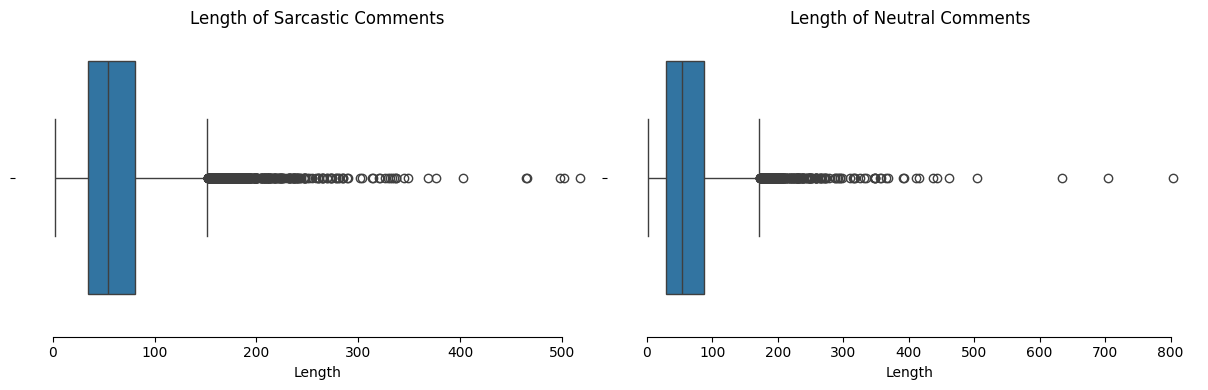

In [14]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Boxplot for Sarcastic Comments
sns.boxplot(x=df.loc[df['label'] == 1, 'comment'].str.len(), ax=axes[0])
axes[0].set_title('Length of Sarcastic Comments')
axes[0].set_xlabel('Length')
sns.despine(offset=10, trim=True, ax=axes[0])

# Boxplot for Neutral Comments
sns.boxplot(x=df.loc[df['label'] == 0, 'comment'].str.len(), ax=axes[1])
axes[1].set_title('Length of Neutral Comments')
axes[1].set_xlabel('Length')
sns.despine(offset=10, trim=True, ax=axes[1])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

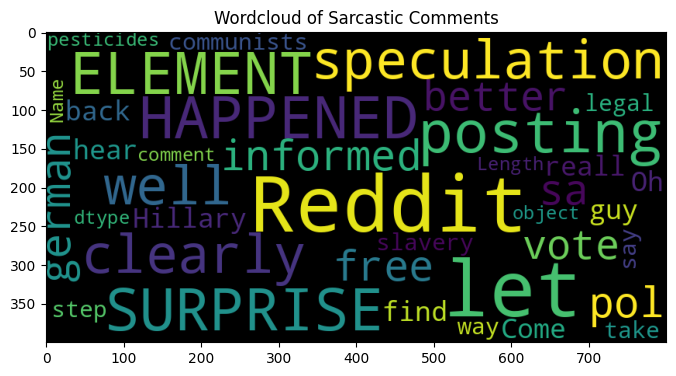

In [15]:
# Wordcloud of Sarcastic comments

# Creating a WordCloud object with specified parameters
wordcloud = WordCloud(background_color='black', stopwords=STOPWORDS,
                      max_words=200, max_font_size=100,
                      random_state=17, width=800, height=400)

# Creating a figure for the WordCloud visualization
plt.figure(figsize=(8, 6))

# Generating the WordCloud based on the text from sarcastic comments
wordcloud.generate(str(df.loc[df['label'] == 1, 'comment']))

# Setting the title for the WordCloud plot
plt.title('Wordcloud of Sarcastic Comments')

# Displaying the WordCloud
plt.imshow(wordcloud);

In the presented word cloud depicting sarcastic comments, certain words such as "Reddit," "surprise," "clearly," "well," "posting," and "let" appear prominently, characterized by their larger font sizes. This prominence suggests that these specific terms wield a considerable influence within the realm of sarcastic expressions. The enlarged representation of these words implies a higher frequency of occurrence, indicating their significance in conveying sarcasm within the dataset. The visual prominence of these terms in the word cloud underscores their potential impact on shaping the sarcastic tone observed in the comments, providing valuable insights into the linguistic patterns and recurring themes associated with sarcasm in the given context.

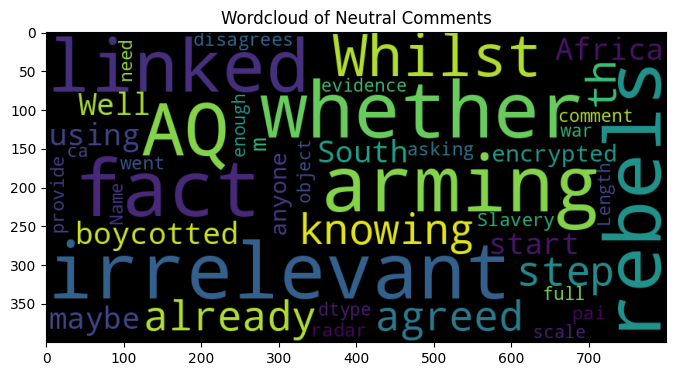

In [16]:
# Wordcloud of Neutral comments

# Creating a WordCloud object with specified parameters
wordcloud = WordCloud(background_color='black', stopwords=STOPWORDS,
                      max_words=200, max_font_size=100,
                      random_state=17, width=800, height=400)

# Creating a figure for the WordCloud visualization
plt.figure(figsize=(8, 6))

# Generating the WordCloud based on the text from neutral comments
wordcloud.generate(str(df.loc[df['label'] == 0, 'comment']))

# Setting the title for the WordCloud plot
plt.title('Wordcloud of Neutral Comments')

# Displaying the WordCloud
plt.imshow(wordcloud);

 Now convert the 'created_utc' column to a datetime format and extracts the day of the week. Then, creates a countplot to visualize the distribution of sarcastic comments across different days, with percentage labels indicating the proportion of sarcastic comments on each day.

In [17]:
# Feature Engineering- Extracting the day of a week
df['created_utc'] = pd.to_datetime(df['created_utc'], format = '%d/%m/%Y %H:%M:%S')
df['Day of Week'] = df['created_utc'].dt.day_name()

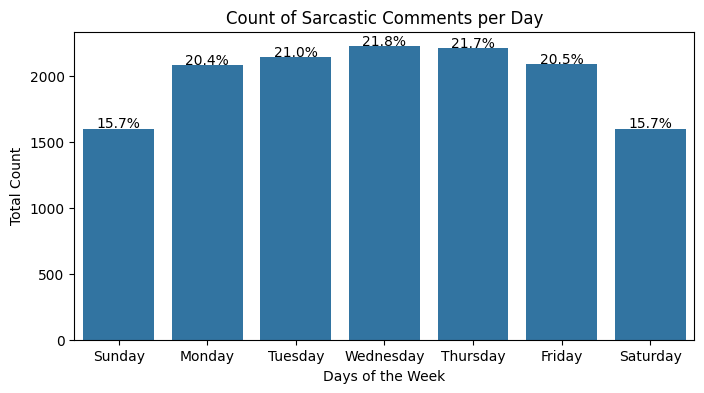

In [18]:
# Plotting the count of sarcastic comments per day of the week
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Day of Week', data=df.loc[df['label'] == 1])
ax.set(title="Count of Sarcastic Comments per Day", xlabel="Days of the Week", ylabel="Total Count")

# Adding percentage labels on top of each bar
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 7,
            '{:1.1f}%'.format((height / total) * 100 * 2),
            ha="center")

# Display the plot
plt.show()

Based on the visual representation above, it is evident that the count of sarcastic comments tends to decrease notably during the weekends. This observed trend may be attributed to a plausible factor—the diminished level of activity or engagement on Reddit during the weekends. The decreased volume of user interactions and discussions during this time period could contribute to a lower occurrence of sarcastic comments. It is essential to consider the influence of varying online participation patterns, such as reduced traffic and user engagement, which might influence the dynamics of comment types, including the prevalence of sarcasm. Further investigation into the temporal patterns of Reddit activity could provide additional insights into the observed fluctuations in sarcastic comment counts.

Let's examine whether the frequency of sarcastic comments changes over time, focusing on the date column. By grouping the data based on the date, we can compute the average label value, which corresponds to the percentage of sarcastic comments. Additionally, we aim to tally the comment count for each month to ensure comparability between months.

In [19]:
by_month = df.groupby("date").agg({"label" : "mean", "comment" : "count"})
by_month

,label,comment
date,,
2013-11,1.000000,42
2014-01,1.000000,104
2014-02,1.000000,93
2014-03,1.000000,151
2014-04,1.000000,125
2014-05,1.000000,153
2014-06,1.000000,130
2014-07,1.000000,292
2014-08,1.000000,345


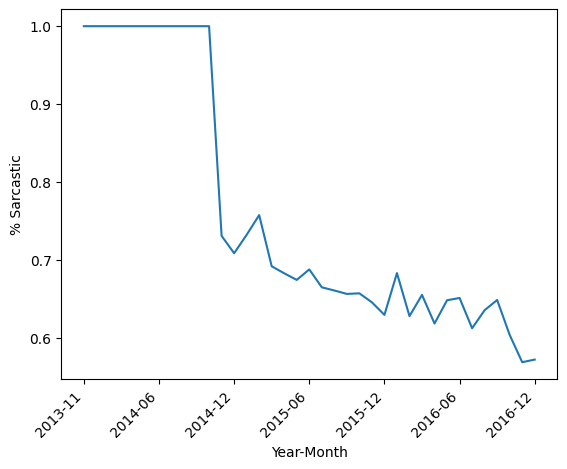

In [20]:
# Extracting month-wise data for visualization
months = list(by_month.index)

# Selecting positions for x-axis labels to avoid crowding
label_pos = list(range(0, len(months), 6))

# Creating a subset of month labels for better readability
m_labels = [months[i] for i in label_pos]

# Plotting the percentage of sarcastic comments over time
plt.plot(months, by_month["label"])
plt.xlabel("Year-Month")
plt.ylabel("% Sarcastic")
plt.xticks(label_pos, m_labels, rotation=45, ha="right")  # Setting x-axis ticks and labels
plt.show()

The depicted graph provides a clear depiction of the temporal evolution of our dataset. Initially, the dataset appears to be predominantly comprised of sarcastic comments, suggesting a higher prevalence of sarcasm during the initial months. However, as the timeline progresses, there is a discernible downward trend in the percentage of sarcastic comments. This trend indicates a shift or evolution in the composition of comments over time, with a decreasing proportion of sarcastic remarks relative to other types of comments. The observed change in the distribution of comment types suggests potential shifts in user behavior or communication patterns over the specified timeframe.

# Data Balancing

In [21]:
!pip install -U imbalanced-learn

In [22]:
# Importing the RandomOverSampler from imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler

# Applying random oversampling to address class imbalance
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Resampling the data
X_resampled, y_resampled = oversampler.fit_resample(df['comment'].values.reshape(-1, 1), df['label'])

# Displaying the shape of the resampled data
X_resampled.shape, y_resampled.shape

((27896, 1), (27896,))

In [23]:
y_resampled.value_counts()

,count
label,
0,13948
1,13948


In [24]:
# Creating a new DataFrame 'new_df' with 'comment' and 'label' columns
new_df = pd.DataFrame({
    'comment': X_resampled.flatten(),  # Flattening the values of X_resampled and assigning to 'comment'
    'label': y_resampled  # Assigning the values of y_resampled to 'label'
})

# Displaying the first few rows of the new DataFrame
new_df.head()

,comment,label
0,all of which is irrelevant to whether or not A...,0
1,"The fact we are arming ""rebels"" linked to AQ i...",0
2,Whilst knowing that what they were doing was i...,0
3,"If she's already agreed to step down, isn't th...",0
4,Were those who boycotted South Africa and only...,0


In [25]:
new_df.shape

(27896, 2)

# Text Preprocessing

In [26]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
# Importing Modules
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Data Cleaning
def text_cleaner(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # Remove hashtags
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    # Remove special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [29]:
new_df.isna().sum()

,0
comment,3
label,0


In [30]:
new_df.dropna(inplace=True)

In [31]:
# combine all processing techniques
def text_processing(text):
    # text cleaing
    text = text_cleaner(text)
    # tokenization
    tokens = word_tokenize(text)
    # stop word removal
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)
new_df['process_comment']=new_df['comment'].apply(text_processing)
new_df

,comment,label,process_comment
0,all of which is irrelevant to whether or not A...,0,irrelevant whether assange self imposed detent...
1,"The fact we are arming ""rebels"" linked to AQ i...",0,fact arming rebels linked aq fucking disgusting
2,Whilst knowing that what they were doing was i...,0,whilst knowing illegal
3,"If she's already agreed to step down, isn't th...",0,shes already agreed step isnt piling
4,Were those who boycotted South Africa and only...,0,boycotted south africa south africa considered...
...,...,...,...
27891,I wonder if the french monarchy would be liked...,0,wonder french monarchy would liked still exist...
27892,"And we all know that (support / pow(hope, 2)) ...",0,know support powhope justice
27893,Privacy... privacy... privacy...,0,privacy privacy privacy
27894,CEO at Halliburton.,0,ceo halliburton


In [32]:
# Initialize an empty dictionary to store word counts
word_count = {}
# Iterate through each processed comment in the 'process_comment' column of the DataFrame
for text in new_df['process_comment']:
    # Calculate the number of words in the processed comment
    words = len(text.split())
    # Exclude comments with more than 100 words
    if words < 100:
        # Update the word_count dictionary with the count of comments having the same word count
        if words not in word_count.keys():
            word_count[words] = 0
        word_count[words] += 1
# Display the resulting word_count dictionary
word_count

{9: 1394,
 7: 2451,
 3: 3265,
 6: 2744,
 10: 1142,
 11: 876,
 8: 1840,
 2: 2929,
 1: 1714,
 14: 339,
 13: 521,
 4: 3540,
 5: 3102,
 15: 245,
 23: 31,
 51: 2,
 19: 88,
 18: 114,
 20: 74,
 21: 70,
 16: 203,
 0: 187,
 12: 660,
 17: 153,
 61: 5,
 22: 49,
 65: 1,
 26: 18,
 35: 9,
 29: 10,
 24: 26,
 25: 16,
 28: 12,
 41: 3,
 33: 5,
 32: 13,
 27: 13,
 31: 6,
 30: 4,
 43: 2,
 48: 1,
 58: 1,
 34: 4,
 40: 2,
 38: 2,
 36: 3,
 46: 1,
 42: 2,
 50: 1}

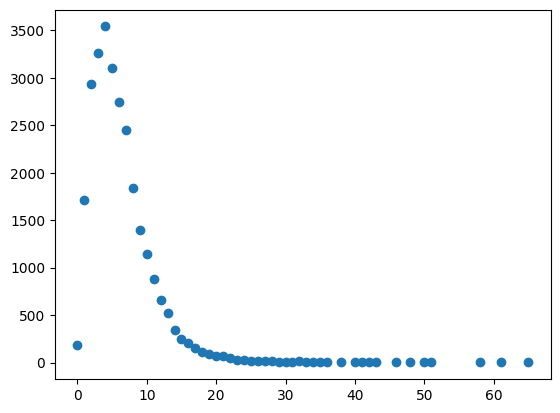

In [33]:
# text length distribution
import matplotlib.pyplot as plt
plt.scatter(list(word_count.keys()),list(word_count.values()))

# Train Test Split

In [34]:
new_df.columns

Index(['comment', 'label', 'process_comment'], dtype='object')

In [35]:
# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split as tts
# Specifying the path for temporary files
temp_folder='/content/drive/Sarcasm classification/Temp/'

In [109]:
# Splitting the data into training and testing sets
# X_train: Features for the training set
# X_test: Features for the testing set
# y_train: Labels for the training set
# y_test: Labels for the testing set
# test_size: The proportion of the dataset to include in the test split (in this case, 35%)
# stratify: Ensures that the distribution of labels in the training and testing sets is similar to the original dataset
# random_state: Seed for reproducibility
X_train, X_test, y_train, y_test = tts(new_df['process_comment'], new_df['label'], test_size=0.35, stratify=new_df['label'],
                                       random_state=5)

In [110]:
# Train and test data dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18130,), (9763,), (18130,), (9763,))

In [38]:
# import numpy as np
# np.save(temp_folder+'y_train.npy',y_train)
# np.save(temp_folder+'y_test.npy',y_test)

#BERT Model

In [39]:
!pip install sentence_transformers

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.


In [111]:
# Importing necessary libraries
import numpy as np
import pickle as pkl
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

# Initializing a SentenceTransformer model using the "xlm-roberta-base" pre-trained model
model = SentenceTransformer("xlm-roberta-base")

In [41]:
X_train.values

array(['yes scorsese copolas movies showed organized crime prohibition ended america',
       'wow didnt see coming',
       'yeah taking peoples freedom western value right', ...,
       'people comments couldnt freak fuck guvment',
       'always reminds time rd grade someone mispronounced', 'oh really'],
      dtype=object)

In [112]:
def get_embedding(texts):
    embeddings = []
    for text in tqdm(texts):
        try:
            # Encode the text using the pre-trained SentenceTransformer model
            text_embed = model.encode(text)
        except Exception as e:
            # Handle exceptions, print the error and set embeddings to zeros if an error occurs
            print(e, text)
            text_embed = np.zeros((768,))
        embeddings.append(text_embed)
    return np.array(embeddings)

# Obtain embeddings for the training set
train_embeddings = get_embedding(X_train.values)

# Obtain embeddings for the testing set
test_embeddings = get_embedding(X_test.values)

100%|██████████| 9763/9763 [02:46<00:00, 58.60it/s]


In [43]:
# Data dimensions after embedding
train_embeddings.shape,test_embeddings.shape

((18130, 768), (9763, 768))

In [44]:
train_embeddings[:10]

array([[-0.05794119,  0.07387114,  0.00472283, ..., -0.05260126,
        -0.00512283, -0.0022445 ],
       [-0.02260229,  0.07351054,  0.03513128, ..., -0.00861104,
         0.04543641,  0.04176817],
       [-0.02537421,  0.05477087,  0.04545914, ..., -0.04258425,
         0.01491204,  0.03044564],
       ...,
       [-0.01433365,  0.06279971,  0.05085201, ...,  0.03603347,
         0.04272249,  0.11725707],
       [ 0.03708226,  0.06810356, -0.0027451 , ..., -0.17360626,
         0.02021967,  0.02042375],
       [-0.01208411,  0.06731121,  0.00781901, ..., -0.0607936 ,
         0.00349761,  0.03914683]], dtype=float32)

In [45]:
# store bert embeddings to npy files
np.save('xlm-roberta_train_embedding.npy',train_embeddings)
np.save('xlm-roberta_test_embedding.npy',test_embeddings)

In [46]:
# load stored npy files(bert embeddings)
train_embeddings = np.load(open('xlm-roberta_train_embedding.npy', 'rb'))
test_embeddings = np.load(open('xlm-roberta_test_embedding.npy', 'rb'))
train_embeddings.shape, test_embeddings.shape

((18130, 768), (9763, 768))

In [47]:
# Required layers for Deep Learning model
from keras.models import Sequential
from keras.layers import Dense,Dropout,InputLayer

In [113]:
# Create a Sequential model
model = Sequential()

# Add a Dense layer with 256 neurons, using ReLU activation function, and input shape (768,)
model.add(Dense(256, input_shape=(768,), activation='relu'))
# Add a Dense layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))
# Add a Dense layer with 32 neurons and ReLU activation function
model.add(Dense(32, activation='relu'))
# Add a Dropout layer with a dropout rate of 0.2 to prevent overfitting
model.add(Dropout(0.2))
# Add a Dense output layer with 1 neuron and a sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))
# Display a summary of the model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 256)               196864    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 233921 (913.75 KB)
Trainable params: 233921 (913.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [115]:
# Train the model
history = model.fit(
    train_embeddings,  # Training data (features)
    y_train,  # Training labels
    epochs=100,  # Number of training epochs
    validation_data=(test_embeddings, y_test),  # Validation data for monitoring performance
    batch_size=256,  # Batch size for each training iteration
    )

Epoch 1/100
71/71 [==============================] - 2s 10ms/step - loss: 0.6947 - accuracy: 0.5274 - val_loss: 0.6828 - val_accuracy: 0.5531
Epoch 2/100
71/71 [==============================] - 1s 8ms/step - loss: 0.6666 - accuracy: 0.5967 - val_loss: 0.6529 - val_accuracy: 0.6132
Epoch 3/100
71/71 [==============================] - 1s 9ms/step - loss: 0.6481 - accuracy: 0.6260 - val_loss: 0.6473 - val_accuracy: 0.6320
Epoch 4/100
71/71 [==============================] - 1s 8ms/step - loss: 0.6370 - accuracy: 0.6352 - val_loss: 0.6453 - val_accuracy: 0.6106
Epoch 5/100
71/71 [==============================] - 1s 8ms/step - loss: 0.6307 - accuracy: 0.6387 - val_loss: 0.6675 - val_accuracy: 0.5806
Epoch 6/100
71/71 [==============================] - 1s 8ms/step - loss: 0.6323 - accuracy: 0.6404 - val_loss: 0.6434 - val_accuracy: 0.6319
Epoch 7/100
71/71 [==============================] - 1s 8ms/step - loss: 0.6174 - accuracy: 0.6612 - val_loss: 0.6443 - val_accuracy: 0.6296
Epoch 8/100


In [116]:
model.evaluate(test_embeddings,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 1.5612 - accuracy: 0.7698


[1.561181664466858, 0.7698453068733215]

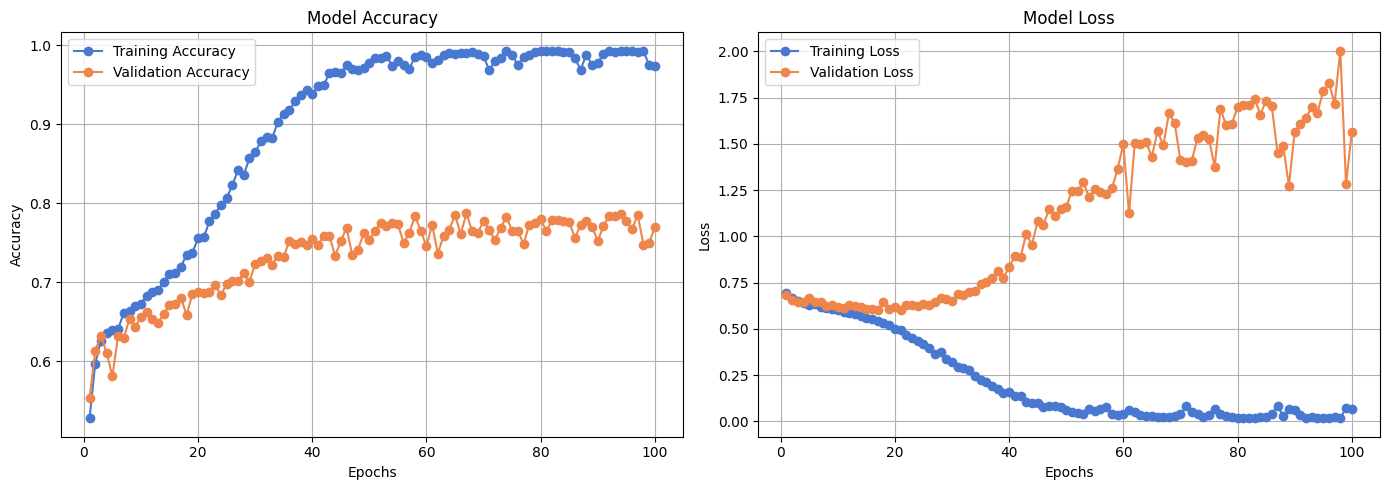

In [117]:
epochs = np.arange(1, len(history.history['accuracy']) + 1)

# Identify highest validation accuracy and lowest validation loss
metrics = {
    'accuracy': ('Max Acc', history.history['val_accuracy'], np.argmax(history.history['val_accuracy'])),
    'loss': ('Min Loss', history.history['val_loss'], np.argmin(history.history['val_loss']))
}

# Create 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for i, (metric, (label, values, idx)) in enumerate(metrics.items()):
    axs[i].plot(epochs, history.history[metric], marker='o', label=f'Training {metric.capitalize()}')
    axs[i].plot(epochs, values, marker='o', label=f'Validation {metric.capitalize()}')
    axs[i].set_title(f'Model {metric.capitalize()}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(metric.capitalize())
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


In [53]:
model.save('xlm-large-RoBertaBestModel2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Evaluation

In [54]:
import numpy as np
train_embeddings=np.load(open('xlm-roberta_train_embedding.npy','rb'))
test_embeddings=np.load(open('xlm-roberta_test_embedding.npy','rb'))
train_embeddings.shape,test_embeddings.shape

((18130, 768), (9763, 768))

In [55]:
import keras
model=keras.models.load_model('xlm-large-RoBertaBestModel2.h5')

In [56]:
y_train_pred=model.predict(train_embeddings)
y_test_pred=model.predict(test_embeddings)
y_train_pred.shape,y_test_pred.shape

306/306 [==============================] - 0s 1ms/step


((18130, 1), (9763, 1))

In [118]:
import numpy as np
train_pred_classes=(y_train_pred>= 0.5).astype(int)
test_pred_classes=(y_test_pred>= 0.5).astype(int)
train_pred_classes.shape,test_pred_classes.shape

((18130, 1), (9763, 1))

In [119]:
from sklearn.metrics import confusion_matrix,classification_report
report=classification_report(y_test,test_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      4881
           1       0.81      0.71      0.76      4882

    accuracy                           0.77      9763
   macro avg       0.78      0.77      0.77      9763
weighted avg       0.78      0.77      0.77      9763



Text(50.722222222222214, 0.5, 'True Labels')

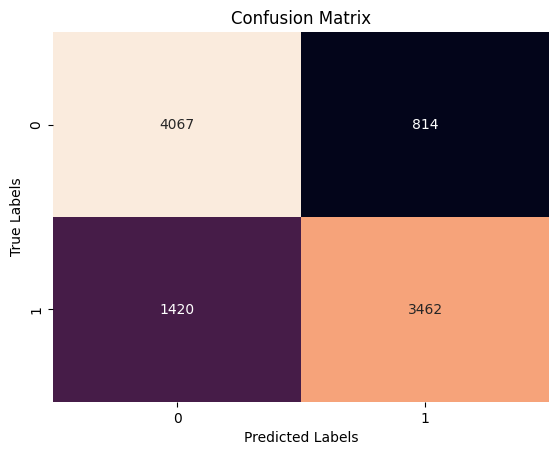

In [120]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set_palette('muted')
cm = confusion_matrix(y_test, test_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [121]:
# Calculate precision, recall, f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, test_pred_classes)
recall = recall_score(y_test, test_pred_classes)
f1 = f1_score(y_test, test_pred_classes)
print(f'Precision for Model-Simple NN with Embedding BERT: {precision:.4f}')
print(f'Recall for Model-Simple NN with Embedding BERT: {recall:.4f}')
print(f'F1 Score for Model-Simple NN with Embedding BERT: {f1:.4f}')

Precision for Model-Simple NN with Embedding BERT: 0.8096
Recall for Model-Simple NN with Embedding BERT: 0.7091
F1 Score for Model-Simple NN with Embedding BERT: 0.7561


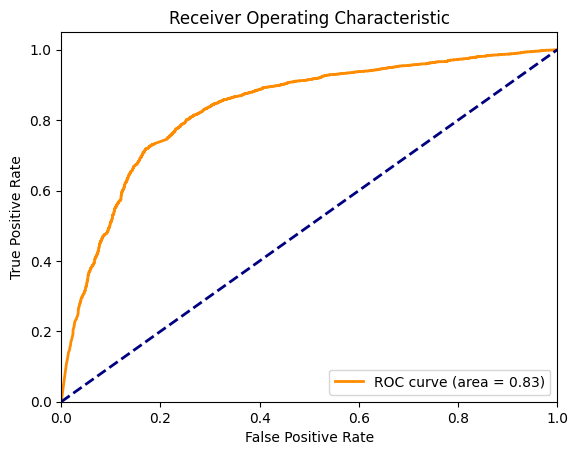

In [122]:
# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Universal Sentence encoder

In [62]:
!pip install tensorflow-text==2.13.0

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.36 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
langchain-core 0.3.21 requires typing-extensions>=4.7, but you have typing-extensions 4.5.0 which is incompatible.
nibabel 5.3.2 requires typing-extensions>=4.6; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
openai 1.54.5 requires typing-extensions<5,>=4.11, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.10.3 req

In [63]:
import tensorflow_hub as hub
import numpy as np
import tensorflow_text
from tqdm import tqdm

In [64]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

In [123]:
def get_embeddings(tweets):
  embeddings=[]
  for text in tqdm(tweets):
    embeddings.append(embed(text)[0])
  return np.array(embeddings)
train_embeds=get_embeddings(X_train)
test_embeds=get_embeddings(X_test)

100%|██████████| 9763/9763 [01:20<00:00, 121.04it/s]


In [124]:
train_embeds.shape,test_embeds.shape

((18130, 512), (9763, 512))

In [67]:
np.save('univ_sent_encoder_train_embedding.npy',train_embeds)
np.save('univ_sent_encoder_test_embedding.npy',test_embeds)

In [125]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,InputLayer
from tensorflow.keras.optimizers import Adam

In [126]:
model=Sequential()
model.add(Dense(256,input_shape=(512,),activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 16)                1040      
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                

In [127]:
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [128]:
history = model.fit(train_embeds,y_train,epochs=100,validation_data=(test_embeds,y_test),batch_size=256)

Epoch 1/100
71/71 [==============================] - 2s 10ms/step - loss: 0.6576 - accuracy: 0.6033 - val_loss: 0.6197 - val_accuracy: 0.6618
Epoch 2/100
71/71 [==============================] - 1s 7ms/step - loss: 0.5987 - accuracy: 0.6900 - val_loss: 0.5954 - val_accuracy: 0.6861
Epoch 3/100
71/71 [==============================] - 1s 7ms/step - loss: 0.5360 - accuracy: 0.7427 - val_loss: 0.5687 - val_accuracy: 0.7114
Epoch 4/100
71/71 [==============================] - 1s 8ms/step - loss: 0.4405 - accuracy: 0.8104 - val_loss: 0.5681 - val_accuracy: 0.7254
Epoch 5/100
71/71 [==============================] - 1s 7ms/step - loss: 0.3422 - accuracy: 0.8649 - val_loss: 0.5997 - val_accuracy: 0.7471
Epoch 6/100
71/71 [==============================] - 1s 8ms/step - loss: 0.2542 - accuracy: 0.9073 - val_loss: 0.6166 - val_accuracy: 0.7623
Epoch 7/100
71/71 [==============================] - 1s 8ms/step - loss: 0.1875 - accuracy: 0.9347 - val_loss: 0.6886 - val_accuracy: 0.7615
Epoch 8/100


In [129]:
model.evaluate(test_embeds,y_test)

306/306 [==============================] - 1s 2ms/step - loss: 1.9430 - accuracy: 0.7843


[1.9430210590362549, 0.7842876315116882]

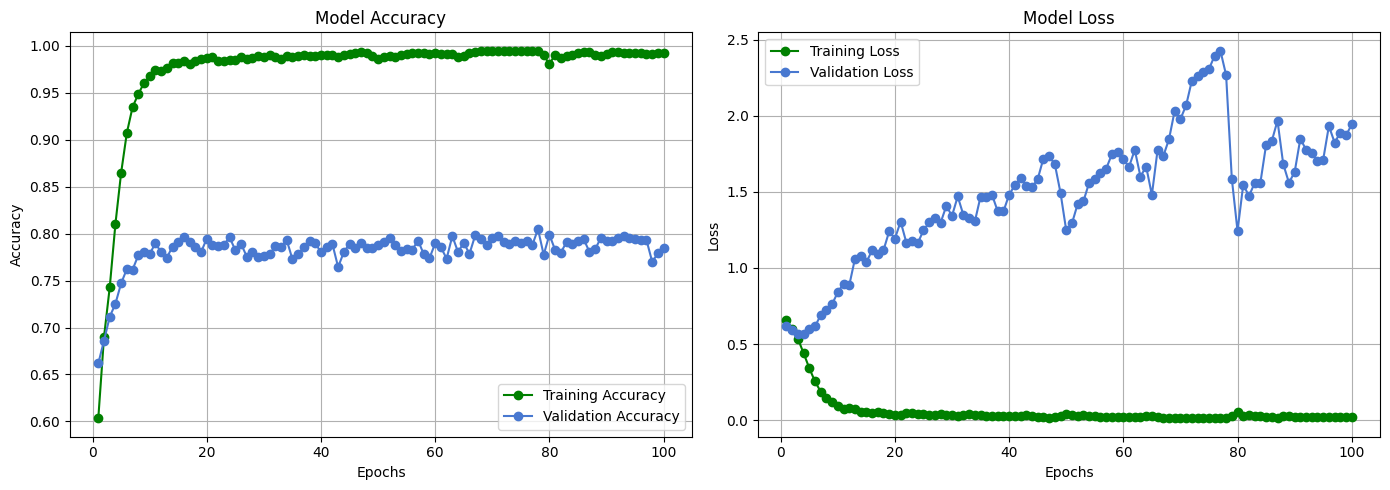

In [130]:
epochs = np.arange(1, len(history.history['accuracy']) + 1)

# Identify highest validation accuracy and lowest validation loss
metrics = {
    'accuracy': ('Max Acc', history.history['val_accuracy'], np.argmax(history.history['val_accuracy'])),
    'loss': ('Min Loss', history.history['val_loss'], np.argmin(history.history['val_loss']))
}

# Create 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for i, (metric, (label, values, idx)) in enumerate(metrics.items()):
    axs[i].plot(epochs, history.history[metric], marker='o', label=f'Training {metric.capitalize()}', c='green')
    axs[i].plot(epochs, values, marker='o', label=f'Validation {metric.capitalize()}')
    axs[i].set_title(f'Model {metric.capitalize()}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(metric.capitalize())
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


##Evaluate

In [131]:
train_embeddings=np.load(open('univ_sent_encoder_train_embedding.npy','rb'))
test_embeddings=np.load(open('univ_sent_encoder_test_embedding.npy','rb'))

In [132]:
y_train_pred=model.predict(train_embeddings)
y_test_pred=model.predict(test_embeddings)
y_train_pred.shape,y_test_pred.shape

306/306 [==============================] - 0s 1ms/step


((18130, 1), (9763, 1))

In [133]:
import numpy as np
train_pred_classes=(y_train_pred>= 0.5).astype(int)
test_pred_classes=(y_test_pred>= 0.5).astype(int)
train_pred_classes.shape,test_pred_classes.shape

((18130, 1), (9763, 1))

In [134]:
from sklearn.metrics import confusion_matrix,classification_report
report=classification_report(y_test,test_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      4881
           1       0.84      0.71      0.77      4882

    accuracy                           0.78      9763
   macro avg       0.79      0.78      0.78      9763
weighted avg       0.79      0.78      0.78      9763



Text(50.722222222222214, 0.5, 'True Labels')

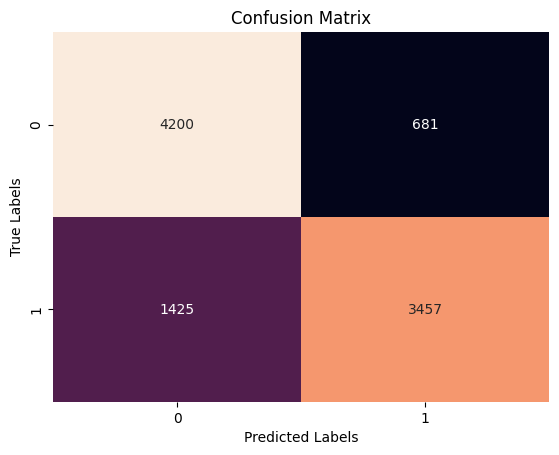

In [135]:
# Plot the confusion matrix

sns.set_palette('muted')
cm = confusion_matrix(y_test, test_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [136]:
# Calculate precision, recall, f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, test_pred_classes)
recall = recall_score(y_test, test_pred_classes)
f1 = f1_score(y_test, test_pred_classes)
print(f'Precision for Model-Simple NN with Embedding USE: {precision:.4f}')
print(f'Recall for Model-Simple NN with Embedding USE: {recall:.4f}')
print(f'F1 Score for Model-Simple NN with Embedding USE: {f1:.4f}')

Precision for Model-Simple NN with Embedding USE: 0.8354
Recall for Model-Simple NN with Embedding USE: 0.7081
F1 Score for Model-Simple NN with Embedding USE: 0.7665


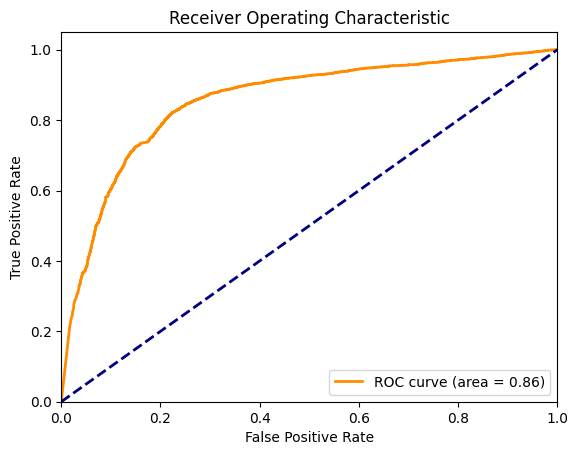

In [137]:
# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [86]:
model.save("USE-Best-Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Tokenization and Sequencing

In [84]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [85]:
text_tokenizer=Tokenizer(num_words=10000)
text_tokenizer.fit_on_texts(X_train)

In [87]:
tokenized_train=text_tokenizer.texts_to_sequences(X_train)
tokenized_test=text_tokenizer.texts_to_sequences(X_test)

In [88]:
len(text_tokenizer.word_index),tokenized_train[:2]

(13651,
 [[13, 8058, 8059, 1440, 1780, 3051, 320, 8060, 1441, 70], [187, 36, 40, 392]])

In [89]:
train_sequence=pad_sequences(tokenized_train,maxlen=40,padding='pre')
test_sequence=pad_sequences(tokenized_test,maxlen=40,padding='pre')
train_sequence[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   13, 8058, 8059,
        1440, 1780, 3051,  320, 8060, 1441,   70],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  187,   36,   40,  392]], dtype=int32)

#MultiHead Attention Based Model

In [90]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Embedding,Bidirectional,LSTM,Flatten
from tensorflow.keras.layers import Dropout, Input, GRU, MultiHeadAttention

In [91]:
from keras import layers

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [96]:
# Model
embedded_dim=80#dimension of embedding layer
voc_size=10000#len(text_tokenizer.word_index)+1
max_sent_len=40
num_heads = 1  # Number of attention heads
ff_dim = 16  # Hidden layer size in feed forward network inside transformer

input_layer = Input(shape=(max_sent_len,))
embedding_layer = Embedding(voc_size, embedded_dim)(input_layer)
# attention_layer = MultiHeadAttention(key_dim=embedded_dim, num_heads=4)([embedding_layer, embedding_layer])
transformer_block = TransformerBlock(embedded_dim, num_heads, ff_dim)
attention_layer = transformer_block(embedding_layer)
gru_layer = GRU(8, return_sequences=True)(attention_layer)
lstm_layer_1 = LSTM(16, return_sequences=True, activation='relu', recurrent_dropout=0.1)(gru_layer)
lstm_layer_2 = LSTM(32, return_sequences=False, activation='relu')(lstm_layer_1)
# flatten_layer = Flatten()(lstm_layer_2)
dense_layer_1 = Dense(64, activation='relu')(lstm_layer_2)
dropout_layer = Dropout(0.2)(dense_layer_1)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 40)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 40, 80)            800000    
                                                                 
 transformer_block_1 (Trans  (None, 40, 80)            28896     
 formerBlock)                                                    
                                                                 
 gru_1 (GRU)                 (None, 40, 8)             2160      
                                                                 
 lstm_2 (LSTM)               (None, 40, 16)            1600      
                                                                 
 lstm_3 (LSTM)               (None, 32)                6272      
                                                           

In [97]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

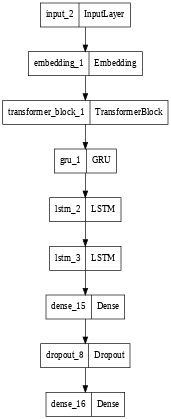

In [98]:
from keras.utils import plot_model
plot_model(model, 'model.png', dpi=48)

In [99]:
history = model.fit(train_sequence,y_train,epochs=50,validation_data=(test_sequence,y_test),batch_size=512)

Epoch 1/50
36/36 [==============================] - 31s 613ms/step - loss: 0.6883 - accuracy: 0.5342 - val_loss: 0.6684 - val_accuracy: 0.5269
Epoch 2/50
36/36 [==============================] - 23s 635ms/step - loss: 0.5684 - accuracy: 0.7066 - val_loss: 0.6116 - val_accuracy: 0.6782
Epoch 3/50
36/36 [==============================] - 25s 683ms/step - loss: 0.3970 - accuracy: 0.8177 - val_loss: 0.5903 - val_accuracy: 0.7260
Epoch 4/50
36/36 [==============================] - 20s 550ms/step - loss: 0.2903 - accuracy: 0.8769 - val_loss: 0.6308 - val_accuracy: 0.7476
Epoch 5/50
36/36 [==============================] - 25s 695ms/step - loss: 0.2232 - accuracy: 0.9101 - val_loss: 0.7532 - val_accuracy: 0.7503
Epoch 6/50
36/36 [==============================] - 20s 550ms/step - loss: 0.1751 - accuracy: 0.9298 - val_loss: 0.7772 - val_accuracy: 0.7601
Epoch 7/50
36/36 [==============================] - 15s 410ms/step - loss: 0.1451 - accuracy: 0.9430 - val_loss: 0.8688 - val_accuracy: 0.7603

In [100]:
model.evaluate(test_sequence,y_test)

306/306 [==============================] - 10s 34ms/step - loss: 2.0175 - accuracy: 0.7712


[2.017522096633911, 0.7711768746376038]

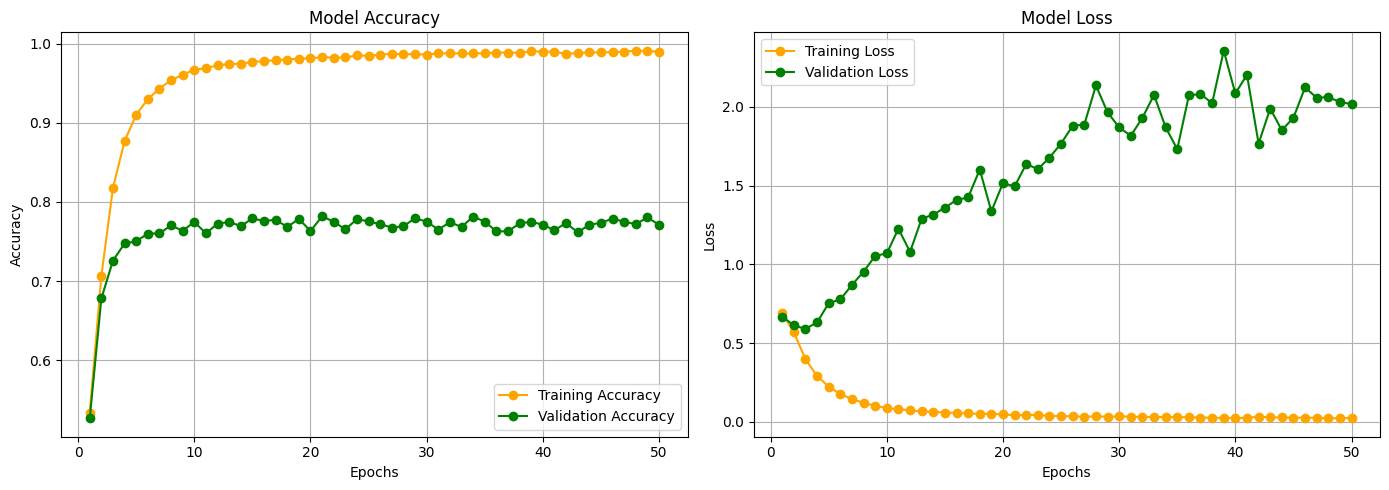

In [101]:
epochs = np.arange(1, len(history.history['accuracy']) + 1)

# Identify highest validation accuracy and lowest validation loss
metrics = {
    'accuracy': ('Max Acc', history.history['val_accuracy'], np.argmax(history.history['val_accuracy'])),
    'loss': ('Min Loss', history.history['val_loss'], np.argmin(history.history['val_loss']))
}

# Create 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

for i, (metric, (label, values, idx)) in enumerate(metrics.items()):
    axs[i].plot(epochs, history.history[metric], marker='o', label=f'Training {metric.capitalize()}', c='orange')
    axs[i].plot(epochs, values, marker='o', label=f'Validation {metric.capitalize()}', c = 'green')
    axs[i].set_title(f'Model {metric.capitalize()}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(metric.capitalize())
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


###Evaluation

In [102]:
y_train_pred=model.predict(train_sequence)
y_test_pred=model.predict(test_sequence)
y_train_pred.shape,y_test_pred.shape

306/306 [==============================] - 9s 30ms/step


((18130, 1), (9763, 1))

In [103]:
import numpy as np
train_pred_classes=(y_train_pred>= 0.5).astype(int)
test_pred_classes=(y_test_pred>= 0.5).astype(int)
train_pred_classes.shape,test_pred_classes.shape

((18130, 1), (9763, 1))

In [104]:
from sklearn.metrics import confusion_matrix,classification_report
report=classification_report(y_test,test_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      4881
           1       0.81      0.71      0.76      4882

    accuracy                           0.77      9763
   macro avg       0.78      0.77      0.77      9763
weighted avg       0.78      0.77      0.77      9763



Text(50.722222222222214, 0.5, 'True Labels')

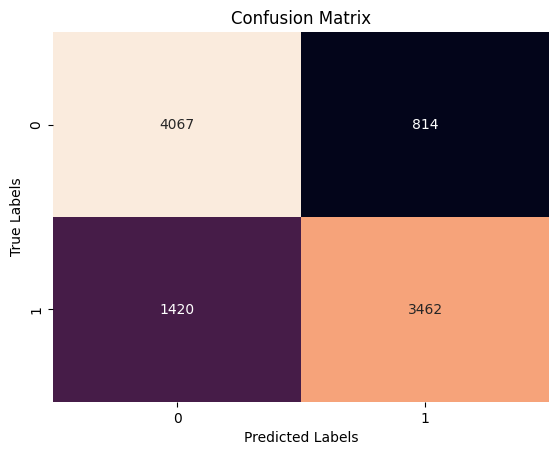

In [105]:
# Plot the confusion matrix

sns.set_palette('muted')
cm = confusion_matrix(y_test, test_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [106]:
# Calculate precision, recall, f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, test_pred_classes)
recall = recall_score(y_test, test_pred_classes)
f1 = f1_score(y_test, test_pred_classes)
print(f'Precision for Model-MultiHead Atttention NN with Embedding Tokenization and Sequencing: {precision:.4f}')
print(f'Recall for Model-MultiHead Atttention NN with Embedding Tokenization and Sequencing: {recall:.4f}')
print(f'F1 Score for Model-MultiHead Atttention NN with Embedding Tokenization and Sequencing: {f1:.4f}')

Precision for Model-MultiHead Atttention NN with Embedding Tokenization and Sequencing: 0.8096
Recall for Model-MultiHead Atttention NN with Embedding Tokenization and Sequencing: 0.7091
F1 Score for Model-MultiHead Atttention NN with Embedding Tokenization and Sequencing: 0.7561


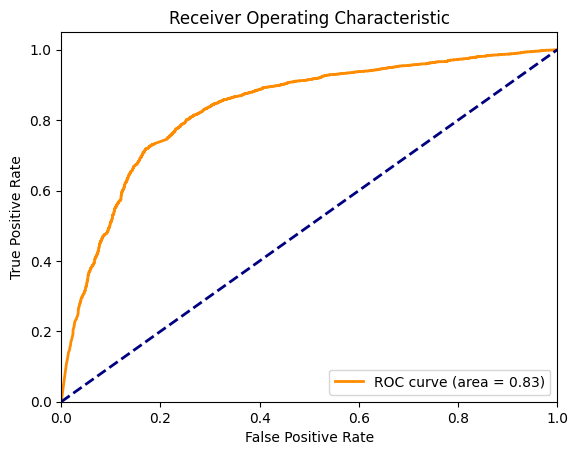

In [107]:
# ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [108]:
model.save("Tokenisation-Attention-Best-Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [138]:
import pandas as pd

# Data for the models
data = {
    "Model": [
        "Simple NN + BERT Embed",
        "Simple NN + USE Embed",
        "MultiHead Attention + Tokenization-Sequencing Embed"
    ],
    "Precision": [0.8096, 0.8354, 0.8096],
    "Recall": [0.7091, 0.7081, 0.7091],
    "F1 Score": [0.7561, 0.7665, 0.7561],
    "Loss": [1.5612, 1.9430, 2.0175],
    "Accuracy": [0.7698, 0.7843, 0.7712]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
file_path = "results.xlsx"
df.to_excel(file_path, index=False)

print(f"Scores saved to {file_path}")


Scores saved to results.xlsx
